<a href="https://colab.research.google.com/github/ondraperny/BI-BPR-2019/blob/master/TensorFlowTutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensorFlow Fashion MNIST tutorial
Fashion MNIST is dataset of clothing.This guide uses the Fashion MNIST dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels).

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# get dataset from Keras
fashion_mnist = keras.datasets.fashion_mnist

# load data and pass them for training and testing(already splited in input file)
# returned data are NumPy arrays
# images - 28x28 NumPy array(each pixel value from 0 to 255)
# labels - number from range 0 to 9
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# classes, each correspond to one label id
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4423680/4422102 [==============================] - 0s 0us/step


### Playing with dataset

Shape of train_images is (60000, 28, 28)


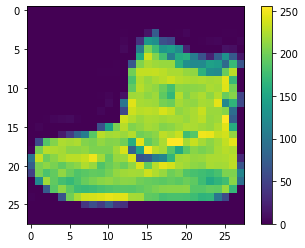

In [0]:
# playing with dataset
print("Shape of train_images is", train_images.shape)

# preprocessing data
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


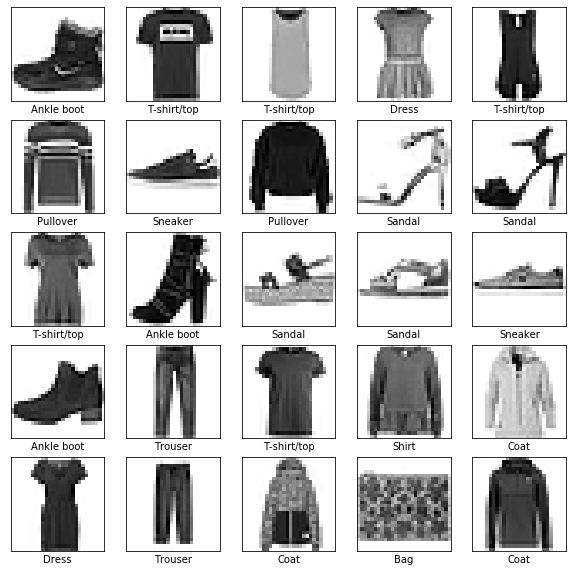

In [0]:
# normalize input data
train_images = train_images / 255.0
test_images = test_images / 255.0

# checking the data in graphic output
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()



## Building the Model
Model is mathematical representation of real world process. Such as classifying objects on images.
Used model is neural networkd, which consist of layers. 

### Few important layers
#### Flatten
As a name indicates, it flatten data(as a FlatMap funtion), data [[1,2][3,4]] becomes [1,2,3,4]
#### Dense 
Regular densely-connecter NN layer. Every neuron is connected to each neuron in neighbour layers.
#### Activation
Applies an activation function to an output. Activation function works as interpreter of output from NN.

### Few activations
#### Relu
Rectified linear unit. With default values - max(x, 0)
#### Softmax
Normalization function, that no matter what input values are(huge/small numbers, negative, etc.), output values are always normalized in (0, 1) interval and add up to 1, so they can be interpreted as probabilities.



In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# additional parameters for model
# loss function measures accuracy of model during training, goal is to minimize
#   this function to increase overall model accuracy
# optimizer defines a way to update model based on data and loss function
# metrics - used metrics, in this case accuracy (others: binari_accuracy,
#   categorical_accuracy, etc.) 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# model is lazy evaluated, training is triggered by fit function, that get
# training data as input and number of epochs - one epoch respond to
# one forward and one backward pass  
model.fit(train_images, train_labels, epochs=10)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.4961 - acc: 0.8248
Epoch 2/10
60000/60000 [==============================] - 4s 62us/sample - loss: 0.3745 - acc: 0.8645
Epoch 3/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.3376 - acc: 0.8777
Epoch 4/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.3106 - acc: 0.8859
Epoch 5/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2944 - acc: 0.8917
Epoch 6/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.2797 - acc: 0.8962
Epoch 7/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.2665 - acc: 0.9004
Epoch 8/10
60000/60000 [==============================] - 4s 62us/sample - loss: 0.2541 - acc: 0.9067
Epoch 9/10
60000/60000 [==============================] - 4s 68us/sample - loss:

## Testing accuracy of model with testing data


In [0]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)


10000/10000 - 0s - loss: 0.3329 - acc: 0.8832

Test accuracy: 0.8832


## Prediction


[6.0432870e-07 1.8185723e-07 3.8622758e-08 5.9527018e-08 8.5832440e-08
 2.0889067e-03 8.3173450e-07 2.6858415e-02 2.1472246e-05 9.7102946e-01]
Prediction was correct, predicted clothes: Coat


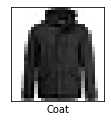

In [0]:
predictions = model.predict(test_images)

# NumPy array with 10 numbers, each represent the model's confidence for
# one type of clothing 
print(predictions[0])

# check if prediction was correct 
index_of_picture = 653
current_pred = np.argmax(predictions[index_of_picture])
if (current_pred == test_labels[index_of_picture]):
  print("Prediction was correct, predicted clothes:", class_names[current_pred])
else:
  print("Prediction was wrong, predicted clothes:", class_names[current_pred])

plt.figure(figsize=(10,10))
plt.subplot(5,5,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(test_images[index_of_picture], cmap=plt.cm.binary)
plt.xlabel(class_names[test_labels[index_of_picture]])
plt.show()


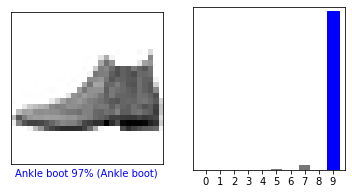

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

# nicer way to represent results(copied from tutorial)
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


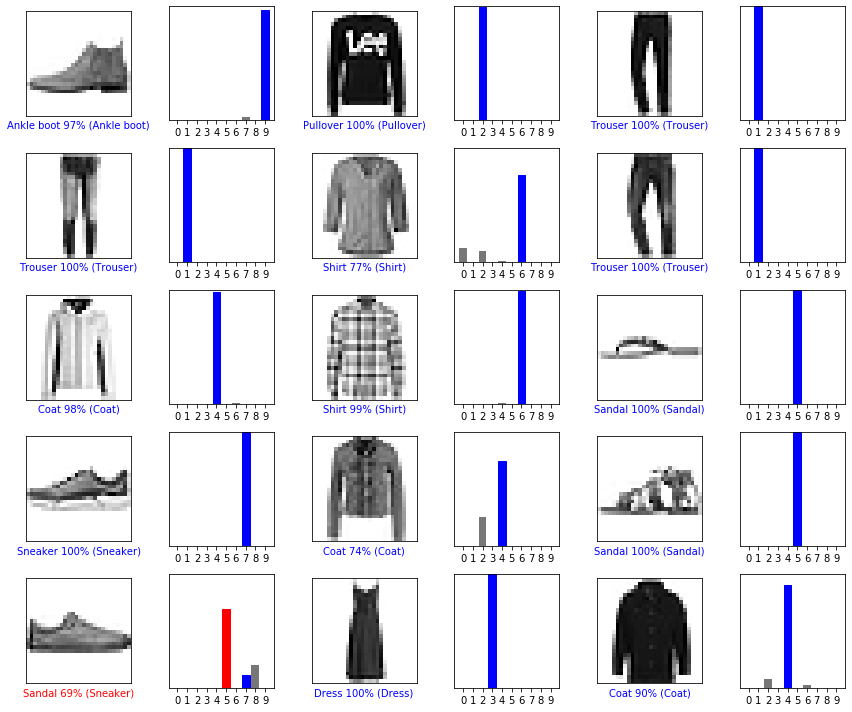

In [0]:
# same as previous but for more predictions
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


(28, 28)
(1, 28, 28)
[[2.2620159e-06 1.3857899e-13 9.9849820e-01 4.6127559e-12 1.4122501e-03
  3.6051899e-17 8.7288863e-05 1.5527193e-20 1.6125923e-10 5.8027568e-19]]


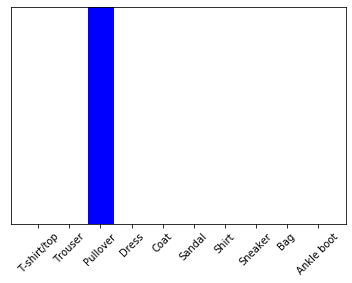

In [0]:
#@title Prediction for one image
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

predictions_single = model.predict(img)

print(predictions_single)

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

